# Команда: Филатова Анна, Павлова Арина, Копейкин Александр

# Шаг 1

Сначала будет представлен код для парсинга

In [1]:
# Так назыавется файл с исходными даннымми в гите: FINAL_CAR_DATA.csv

In [1]:
import numpy as np
import pandas as pd
import requests      # Библиотека для отправки запросов
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек
import time
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
from fake_useragent import UserAgent
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

Функция для сбора ссылок на авто

In [2]:
def get_page(p):
    car_links = []
    try:   
        url = 'https://auto.ru/odintsovo/cars/mercedes/all/?page={}'.format(p)
        headers = {'User-Agent': UserAgent().chrome}
        page = requests.get(url, headers=headers)
        tree = BeautifulSoup(page.content, 'html.parser')
        list_cars = tree.find_all('div', {'class' : 'ListingItem-module__container yfnNqZQFB37ZapTJ4ZqHrh9_jpc4V8kiq_ozCcSBi6A'})
        for link in range(len(list_cars)):
            one_car = list_cars[link].find('div', {'class': 'ListingItem-module__description'})
            one_car = one_car.a.get('href')
            car_links.append(one_car)
    except:
        print(response)
    return car_links

Непосредственно сбор сылок на авто с помощью цикла

In [ ]:
all_links = []
for pages in tqdm(range(1 ,101)):
    time.sleep(3)
    all_links.extend(get_page(pages))

Функция для сбора данных по каждой машине

In [ ]:
lost_links = []
def getData(car_link):
    try:
    
        #car_link = 'https://auto.ru/cars/used/sale/mercedes/e_klasse_amg/1103623785-4d11f3da/'
        response = requests.get(car_link, headers = {'User-Agent':UserAgent().chrome}, timeout = 15)
        tree = BeautifulSoup(response.content, 'html.parser')
        #Заголовок
        head = tree.find('div', {'class': 'LayoutSidebar__content'})
        name = head.find('div', {'class': 'CardSidebarActions'})
        #Название авто
        name = head.find('div', {'class': 'CardSidebarActions__title'}).text
        #Цена
        price = head.find('div', {'class': 'CardSidebarActions__price-caption'})
        price = price.find('span', {'class': 'OfferPriceCaption__price'}).text[:-2]
        price = price.replace(u'\xa0', u'')
        price# = int(price)

        #Характеристики
        characteristics = head.find('div', {'class': 'CardOfferBody__twoColumns'})
        #Год выпуска
        year = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_year'})
        year = "" if not year else year.a.text
        #Пробег
        kilometres = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_kmAge'})
        kilometres = kilometres.find_all('span', {'class': 'CardInfoRow__cell'})
        kilometres = "" if not kilometres else kilometres[1].get_text()[:-3]
        kilometres = kilometres.replace(u'\xa0', u'')
        kilometres  = int(kilometres)
        #Кузов
        body = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_bodytype'})
        body = "" if not year else body.a.text
        #Цвет
        color = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_color'})
        color = color.find_all('span', {'class': 'CardInfoRow__cell'})
        color = "" if not color else color[1].get_text()
        #Двигатель:
        engine = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_engine'})
        engine = engine.div.text.split('/')
        #Объем двигателя
        engine_volume = "" if not engine else float(engine[0][:-3])
        #Мощность двигателя
        engine_power = "" if not engine else int(engine[1].split()[0])
        #Тип двигателя
        engine_type = "" if not engine else engine[-1].split()[0]
        #Налог
        tax = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_transportTax'})
        tax = tax.find_all('span', {'class': 'CardInfoRow__cell'})
        tax = "" if not tax else int(tax[1].text.replace(u'\xa0', u'').split('/')[0][:-2])
        #Коробка передач
        gears = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_transmission'})
        gears = gears.find_all('span', {'class': 'CardInfoRow__cell'})
        gears = "" if not gears else gears[1].get_text()
        #Привод
        actuator = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_drive'})
        actuator = actuator.find_all('span', {'class': 'CardInfoRow__cell'})
        actuator = "" if not actuator else actuator[1].get_text()
        #Руль
        wheel = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_wheel'})
        wheel  = wheel.find_all('span', {'class': 'CardInfoRow__cell'})
        wheel  = "" if not wheel  else wheel[1].get_text()
        #Состояние
        condition = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_state'})
        condition  = condition.find_all('span', {'class': 'CardInfoRow__cell'})
        condition  = "" if not condition  else condition[1].get_text()
        #Владельцы
        owners = characteristics.find('li', {'class': 'CardInfoRow CardInfoRow_ownersCount'})
        owners  = owners.find_all('span', {'class': 'CardInfoRow__cell'})
        owners  = "" if not owners  else owners[1].get_text().replace(u'\xa0', u' ')
        #Сумма по кредиту
        try:
            credit = int(characteristics.find_all('div', {'class': 'CreditCalculatorDesktop__field-value'})[1].text.split('/')[0].replace(u'\xa0' , u'')[:-2])
            credit = "" if not credit else credit
        except:
            credit = '-'
        #Создадим первый словарь для будущей таблицы с описанием количества параметров

        first_table = defaultdict()
        columns = ['Комфорт', 'Безопасность', 'Мультимедиа', 'Салон', 'Обзор', 'Защита от угона', 'Элементы экстерьера']
        try:
            all_features = characteristics.find_all('div', {'class': 'AccordionSection ComplectationGroups__group'})

            #Создаем словарь с количеством описательных признаков
            for item in all_features:
                try:
                    feature = item.find('div', {'class': 'ComplectationGroups__item'})
                except:
                    first_table['wrong_findings'] = '-'
                try:
                    feature_name  = feature.find('span', {'class': 'ComplectationGroups__itemName'}).text
                    if feature_name in columns:
                        feature_quantity = int(feature.find('span', {'class': 'ComplectationGroups__itemCount'}).text)
                        first_table[feature_name] = feature_quantity
                except:
                    first_table[feature_table] = '-'
        except:
            for i in columns:
                first_table[i] = '-'

        #Создадим финальный словарь
        data_row = {"Название авто":name, "Цена":price, 
                         "Год выпуска":year, 
                        "Пробег":kilometres,
                        "Кузов":body,"Цвет":color, "Объем двигателя":engine_volume, 
                        "Мощность двигателя":engine_power, "Тип двигателя":engine_type, "Налог":tax, "Коробка передач":gears,
                        "Привод":actuator, "Руль":wheel, "Состояние":condition,"Владельцы":owners,"Сумма по кредиту":credit}
        first_table.update(data_row)
        return first_table
    except:
        pass
        lost_links.append(car_link)
        return 'no' 

Непосредственный сбор данных по каждому авто: характеристики собираются, стакаются в табличку ,и обновленная табличка сразу же сохраняется в файл.

In [ ]:
for car_link in tqdm(links_final):
    time.sleep(3)
    data = getData(car_link)
    if data == None:
        print(data)
    else:
        final_df = final_df.append(data, ignore_index=True)
        final_df.to_csv('FINALCAR_DATA', 'w')

В конце считываем данные из файла, получаяя итоговую таблицу со данными.

In [2]:
df = pd.read_csv('FINALCAR_DATA.csv', delimiter='w')


In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Название авто,Цена,Год выпуска,Пробег,Кузов,Цвет,Объем двигателя,Мощность двигателя,Тип двигателя,Налог,...,Состояние,Владельцы,Сумма по кредиту,Безопасность,Защита от угона,Комфорт,Мультимедиа,Обзор,Салон,Элементы экстерьера
0,"Mercedes-Benz E-Класс IV (W212, S212, C207)",1175000,2011,153000,седан,белый,3.5,272,Бензин,40800,...,Не требует ремонта,3 или более,22650,9.0,4.0,15.0,5.0,8.0,14.0,2.0
1,Mercedes-Benz AMG GT I Рестайлинг,7890000,2019,21000,лифтбек,чёрный,3.0,367,Бензин,110100,...,Не требует ремонта,1 владелец,96200,13.0,4.0,23.0,9.0,8.0,14.0,3.0
2,Mercedes-Benz V-Класс II,20995000,2020,1,минивэн,чёрный,2.1,190,Дизель,10450,...,Не требует ремонта,1 владелец,-,13.0,4.0,13.0,5.0,6.0,10.0,4.0
3,Mercedes-Benz R-Класс I Рестайлинг,830000,2009,184000,минивэн,чёрный,3.5,272,Бензин,40800,...,Не требует ремонта,3 или более,16000,1.0,NaN,5.0,NaN,1.0,4.0,1.0
4,"Mercedes-Benz E-Класс IV (W212, S212, C207) Ре...",1750000,2013,80000,купе-хардтоп,коричневый,3.5,306,Бензин,45900,...,Не требует ремонта,3 или более,33700,13.0,3.0,15.0,5.0,6.0,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,Mercedes-Benz GLK-Класс I (X204),850000,2009,187000,внедорожник 5 дв.,чёрный,3.0,231,Бензин,17325,...,Не требует ремонта,3 или более,16400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1737,Mercedes-Benz S-Класс III (W140) Рестайлинг,530000,1995,345000,седан,чёрный,2.8,193,Бензин,9457,...,Не требует ремонта,3 или более,-,5.0,2.0,10.0,3.0,2.0,8.0,1.0
1738,Mercedes-Benz SL-Класс IV (R129) Рестайлинг 2,3000000,1999,200000,родстер,чёрный,5.0,306,Бензин,45900,...,Не требует ремонта,2 владельца,-,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1739,"Mercedes-Benz CLA I (C117, X117)",1700000,2016,54000,седан,фиолетовый,1.6,156,Бензин,7644,...,Не требует ремонта,1 владелец,32750,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Шаг 2

Данные собраны успешно, поэтому пропуски имеются только в категориях: 'Безопасность',
'Защита от угона', 'Комфорт', 'Мультимедиа', 'Обзор', 'Салон','Элементы экстерьера'. Это связано с тем, что в объявлении могут вообще не указывать количество особенностей по каждой из данных категорий или с тем, что в объявлении нет описания для некоторой категории, но есть описание по остальным.
В таком случае самым разумным решением будет заменить Nan в категории на нулевое значение, потому что если в объявлении особенности не укзаны, значит, покупатель не может их анализировать и сравнивать с другими предложениями. Следовательно, он по умолчанию подразумевает, что у модели может не быть особенностей, которые не указаны на прямую.



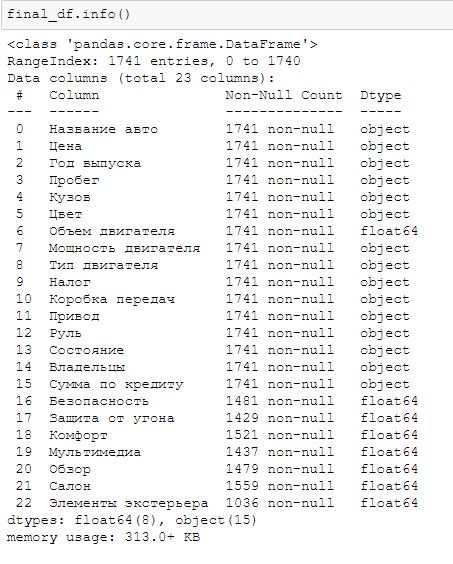

На фото доказывается то, что Nan есть только у перечисленных категорий.

In [4]:
df = df.fillna(0)

# Шаг 3

Добавляем новые признаки. Сначала обработаем год выпуска машины. Разобъем годы выпуска на диапазоны и для соответствующего диапазона дадим машине качественную характеристику, которая будет выражена численно. Это понадобится в дальнейшем для построения матрицы корреляций. Соответствие следующее: 0 - Старый. 1 - Устаревший. 2 - Средних лет. 3 - Новый. 4 - Новейший. 

In [5]:
df['Год выпуска'].describe()

count    1741.000000
mean     2014.049971
std         5.619683
min      1959.000000
25%      2012.000000
50%      2015.000000
75%      2018.000000
max      2021.000000
Name: Год выпуска, dtype: float64

In [6]:
values = []
for year in df['Год выпуска']:
    if year < 2000:
        values.append(0)
    elif 2000 <= year < 2005:        
        values.append(1)
    elif 2005 <= year < 2010:
        values.append(2)
    elif 2010 <= year < 2015:
        values.append(3)
    elif 2015 <= year <= 2021:
        values.append(4)

Добавим получившийся новый признак в таблицу.Далее все новые признаки также добавляются в таблицу.

In [7]:
df.insert(3, 'Новизна', values, True)

In [8]:
df['Новизна'].value_counts()

4    1002
3     494
2     145
1      51
0      49
Name: Новизна, dtype: int64

Всех больше авто категории "Новейший". Однако 49 машин даже до 2000 года. Посмотрним в долях.

In [9]:
df['Новизна'].value_counts(normalize = True) * 100

4    57.553130
3    28.374497
2     8.328547
1     2.929351
0     2.814474
Name: Новизна, dtype: float64

Самых новых почти 60%

В качестве продолжения к формированию предыдущего признака: теперь действительно обозначим качественную характеристику для каждого авто в зависимости от года выпуска. Это необходимо для лучшего восприятия.

In [10]:
values_names = []
for year in df['Год выпуска']:
    if year < 2000:
        values_names.append('Старый')
    elif 2000 <= year < 2005:        
        values_names.append('Устаревший')
    elif 2005 <= year < 2010:
        values_names.append('Средних лет')
    elif 2010 <= year < 2015:
        values_names.append('Новый')
    elif 2015 <= year <= 2021:
        values_names.append('Новейший')

In [11]:
df.insert(4, 'Степень новизны', values_names, True)

Проанализируем остальные критерии.

In [12]:
df['Состояние'].value_counts()

Не требует ремонта    1741
Name: Состояние, dtype: int64

По критерию "Состояние" все авто новые.

Создадим новый признак, основанный на разбиении значений пробега на диапазоны и введения качественной характеристики для его описания. 

In [13]:
df['Пробег'].describe()

count      1741.000000
mean      99184.383688
std       78317.645505
min           1.000000
25%       41000.000000
50%       80226.000000
75%      141000.000000
max      530000.000000
Name: Пробег, dtype: float64

In [14]:
intensivity_names = []
for kms in df['Пробег']:
    if kms < 20000:
        intensivity_names.append('Как новый')
        #print(year)
    elif 20000 <= kms < 41000:        
        intensivity_names.append('Немного использованный')
    elif 41000 <= kms < 80000:
        intensivity_names.append('Средняя степень использования')
        #print(year)
    elif 80000 <= kms < 140000:
        intensivity_names.append('Стандартный срок')
    elif 140000 <= kms <= 530000:
        intensivity_names.append('Большой пробег')

In [15]:
df.insert(5, 'Оценка пробега', intensivity_names, True)

In [16]:
df['Оценка пробега'].value_counts(normalize = True) * 100

Большой пробег                   25.732338
Стандартный срок                 24.755887
Средняя степень использования    24.526134
Как новый                        12.923607
Немного использованный           12.062033
Name: Оценка пробега, dtype: float64

Более половины всех авто имеют пробег свыше 80 000 км.

Переведем значения цены в таблице в интовый тип

In [17]:
price_list = []
for price in df['Цена']:
    if ' ' in price:
        price = int(price.split(' ')[1])
    else:
        price = int(price)

    price_list.append(price)

In [18]:
df['Цена'] = price_list

Вводим новый критерий оценки цены авто. Разбиваем цены по диапазонам и соответствующим образом озарактеризовываем каждую машину с помощью качественных переменных.

In [19]:
# Оценка стоимости

a = np.zeros(shape=(1741,1)).astype(str)
k = 0
for i in df['Цена'].values:
    if i <= 1500000:
        a[k] = 'Бюджетный сегмент'
    elif i > 1500000 and i <= 2500000:
        a[k] = 'Средняя цена'
    else:
        a[k] = 'Повышенная стоимость'
    k += 1
df['Дороговизна'] = a

Новый критерий, показывающий, какой налог придется заплать продавцу после реализации товара.

In [20]:
# налог на продажу

a = np.zeros(shape=(1741,1)).astype(int)
k = 0
for sale_price in df['Цена'].values:
    a[k] = sale_price * 0.13
    k += 1
df['Стандартный налог на продажу'] = a

Еще один новый признак  - литровая мощность. Рассчитывается как отношение мощности двигателя к его объему. Для расчета переведем рассчитаем значение мощности в кВт.

In [21]:
df['Стандартный налог на продажу']

0        152750
1       1025700
2       2729350
3        107900
4        227500
         ...   
1736     110500
1737      68900
1738     390000
1739     221000
1740     377000
Name: Стандартный налог на продажу, Length: 1741, dtype: int32

In [22]:
# литровая мощность

df['Литровая мощность двигателя'] = (df['Мощность двигателя'].values / 1.3783) / df['Объем двигателя'].values

Итак, на 3 шаге мы создали несколько новых признаков, выраженных и качественными , и количественными переменными. Некоторые из них будут использованы при дальнейшем исследовании.

# Шаг 4

График 1.

In [25]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

import plotly.express as px
fig = px.histogram(df, x="Цена",  title = 'Гистограмма распределения авто по цене')

fig.show()


Анализ:
В основном на рынке автомобилей представлены машины в ценовом диапозоне до 10 млн руб. 
А чаще всего встречаются авто не дороже 5 млн. руб.

График 2. Гистограмма распределения по кузову

In [26]:

a = np.zeros(shape=(1741,1))
k = 0
znach = dict()
n = 0
for i in df.values:
    if i[7] in znach:
        a[k] = znach[i[7]]
    else:
        znach[i[7]] = n
        a[k] = n
        n += 1
    k += 1
    if k == 1740:
        break
df['Кузов 1'] = a
mf = pd.DataFrame(znach, index=[0])
mf
#ниже приведена таблица соответствия типа кузова номеру

,седан,лифтбек,минивэн,купе-хардтоп,купе,внедорожник 5 дв.,хэтчбек 5 дв.,универсал 5 дв.,хэтчбек 3 дв.,родстер,кабриолет,внедорожник 3 дв.
0,0,1,2,3,4,5,6,7,8,9,10,11


In [27]:
import plotly.express as px
fig = px.histogram(df, x="Кузов 1", title = 'Гистограмма распределения типов кузова авто')
fig.show()
#Кузов 1 - цифровое обозначение типов кузова, представленных в таблице mf

Аналитика:
На гистограмме ниже видно, что в продаже чаще всего встречаются автомобили под номером 0 и 5, то есть седан и внедорожник 5 дв. соответственно. Причем отрыв от других типов кузовов довольно большой
реже всего люди продают лифтбеки, хэтчеки 5 дв., кабриолеты и внедорожники 3 дв.

График 3. Распределение по совокупным преимуществам.

Для расчета данного нового признака возьмем значения категорий 'Безопасность', 'Защита от угона', 'Комфорт',
'Мультимедиа', 'Обзор', 'Салон', 'Элементы экстерьера' и сложим их для каждого автомобиля. Тем самым мы получим общее количество особенностей, которыми обладает автомобиль по сумме всех категорий.
На оснвое полученных значений построим гистограмму.

In [28]:
common_value = df['Комфорт'] + df['Обзор'] +  df['Безопасность']+ df['Защита от угона']+ df['Мультимедиа']+ df['Салон'] + df['Элементы экстерьера']

In [29]:
df.insert(3,'Совокупные преимущества', common_value, True)

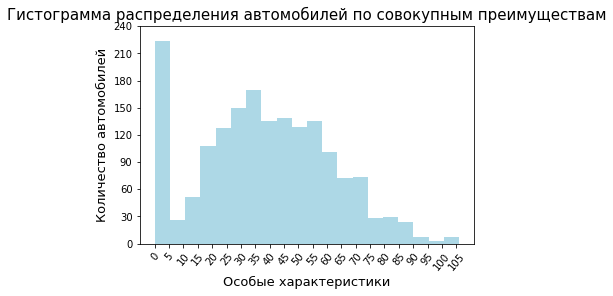

In [30]:
data = df['Совокупные преимущества']
plt.hist(data, color = 'LightBlue',  bins =20);
plt.title('Гистограмма распределения автомобилей по совокупным преимуществам',fontsize = 15, loc = 'center'); #в данном случа loc ничего не поменял
plt.xlabel('Особые характеристики', fontsize = 13);
plt.ylabel('Количество автомобилей',fontsize = 13);
plt.xticks(np.arange(0, df['Совокупные преимущества'].max(), 5));
plt.xticks(rotation = 50);
plt.yticks(np.arange(0, 250, 30));

Достаточно много автомобилей (около 220) практичести не имеют преимуществ, которые описываются в объявлении по продаже авто словесно. Возможно, такой результат связан с тем, что в объявлении отсутствуют какие - либо качественные характерисити авто. На шаге 2 в подобных ситуациях пропуски заменялись нулевымри значениями.
Тем не менее основная масса выборки имеют достаточное количесво преимуществ, которые раскрыти в описании. Локальным максимум является значение в 35 совокупных фишек авто, которые оказались в наличии у 170 машин.
Примечательно, что в совокупности приблизительно у 30 автомобилей количество характеристик больше 90.

График 4. Гистограмма распределения по объему двигателя.

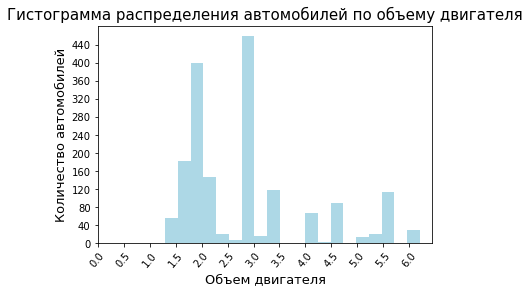

In [31]:
data = df['Объем двигателя']
plt.hist(data, color = 'LightBlue',  bins =20);
plt.title('Гистограмма распределения автомобилей по объему двигателя',fontsize = 15, loc = 'center'); #в данном случа loc ничего не поменял
plt.xlabel('Объем двигателя', fontsize = 13);
plt.ylabel('Количество автомобилей',fontsize = 13);
plt.xticks(np.arange(0, df['Объем двигателя'].max(), 0.5));
plt.xticks(rotation = 50);
plt.yticks(np.arange(0, 450, 40));

Более 440 автомобилей имеют трехлитровые двигатели. На втором месте по популярности - двухлитровые. Приблизительно у 30 машин стоят двигатели объемом 6 литров

In [32]:
sorted(df['Объем двигателя'].value_counts(normalize = True) * 100, reverse = True)

[22.228604250430788,
 18.724870763928777,
 10.22400919012062,
 7.696726019529006,
 6.777713957495692,
 6.547960941987363,
 5.11200459506031,
 4.192992533026995,
 3.848363009764503,
 3.676048248133257,
 2.010338885697875,
 1.2062033314187248,
 1.1487650775416427,
 1.0338885697874785,
 0.9190120620333142,
 0.8615738081562321,
 0.80413555427915,
 0.6892590465249857,
 0.6318207926479035,
 0.4595060310166571,
 0.2871912693854107,
 0.2871912693854107,
 0.22975301550832855,
 0.11487650775416428,
 0.11487650775416428,
 0.05743825387708214,
 0.05743825387708214,
 0.05743825387708214]

Двигатели объемом 2 и 3 литра стоят на 40% автомобилей.

График 5. Распределение по доле налога в стоимости.

Для построения графика также придется прибегнуть к дополнительным расчетам.Фактически мы создаем новый признак. Для его расчета  поделим налог на ТС на его цену продаджи. Тем самым мы узнаем, какой процент от стоимости машины будущий владелец будет ежегодно выплачивать государству.

In [33]:
tax_in_price = df['Налог']/ df['Цена'] * 100

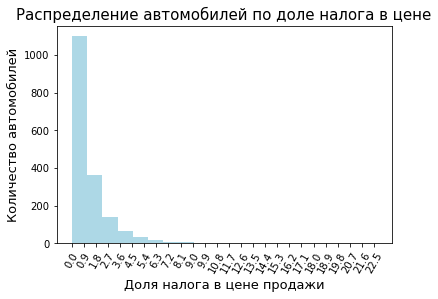

In [34]:
data = tax_in_price
plt.hist(data, color = 'LightBlue',  bins =20);
plt.title('Распределение автомобилей по доле налога в цене',fontsize = 15, loc = 'center'); #в данном случа loc ничего не поменял
plt.xlabel('Доля налога в цене продажи', fontsize = 13);
plt.ylabel('Количество автомобилей',fontsize = 13);
plt.xticks(np.arange(0, tax_in_price.max(), 0.9));
plt.xticks(rotation = 60);

In [35]:
sorted(tax_in_price)[1700:1741]

[5.637931034482759,
 5.7272727272727275,
 5.849246231155779,
 5.884615384615385,
 5.930232558139535,
 6.044444444444444,
 6.044444444444444,
 6.126315789473684,
 6.145318713097963,
 6.276923076923077,
 6.30407911001236,
 6.382978723404255,
 6.4,
 6.605714285714286,
 6.628701594533029,
 6.689655172413793,
 6.689655172413793,
 6.7105263157894735,
 6.800000000000001,
 6.845637583892618,
 6.847058823529411,
 7.2749999999999995,
 7.285714285714286,
 7.285714285714286,
 7.461538461538461,
 7.470000000000001,
 7.559423301727497,
 7.6499999999999995,
 8.143322475570033,
 8.16,
 8.434782608695652,
 8.5,
 8.5,
 8.6625,
 8.742857142857142,
 9.5625,
 9.748743718592964,
 9.781512605042018,
 15.440000000000001,
 16.74,
 22.666666666666664]

In [36]:
df['Состояние'].value_counts()

Не требует ремонта    1741
Name: Состояние, dtype: int64

В подавляющем большинстве случаев доля транспортного налога в цене продажи минимальна и составляет не более 5%. Однако в единичных случаях доля колеблется от 8 до 9%, у трех авто она составляет 15, 16 и 22%. Данные аномальные отклонения для этих авто могут быть связаны с демпингованием цены, или с тем, что машина продается в неисправном состоянии(хотя согласно категории "Состояние" ни одна из машин не требует ремонта). Также подобные отклонения могут быть связаны с тем, что продавец намеренно занижает цену с целью привлечения внимания покупателей и их обращения к продавцу за уточнениями.



График 6. Матрица корреляции.

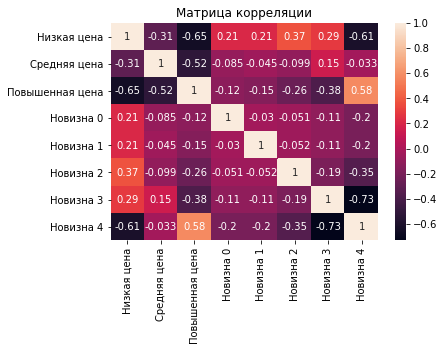

In [37]:
p1 = np.zeros(shape=(1741,1))
p2 = np.zeros(shape=(1741,1))
p3 = np.zeros(shape=(1741,1))
n0 = np.zeros(shape=(1741,1))
n1 = np.zeros(shape=(1741,1))
n2 = np.zeros(shape=(1741,1))
n3 = np.zeros(shape=(1741,1))
n4 = np.zeros(shape=(1741,1))
k = 0
n = 0
for i in df.values:
    if i[27] == 'Бюджетный сегмент':
        p1[k] = 1
    elif i[27] == 'Средняя цена':
        p2[k] = 1
    else:
        p3[k] = 1
    if i[4] == 0:
        n0[k] = 1
    elif i[4] == 1:
        n1[k] = 1
    elif i[4] == 2:
        n2[k] = 1
    elif i[4] == 3:
        n3[k] = 1
    else:
        n4[k] = 1
    k += 1
    if k == 1740:
        break
df['Низкая цена'] = p1
df['Средняя цена'] = p2
df['Повышенная цена'] = p3
df['Новизна 0'] = n0
df['Новизна 1'] = n1
df['Новизна 2'] = n2
df['Новизна 3'] = n3
df['Новизна 4'] = n4

import seaborn as sns
sns.heatmap(df[[x for x in df.columns if 'цена' in x or 'Новизна 0' in x or 'Новизна 1' in x or 'Новизна 2' in x or 'Новизна 3' in x or 'Новизна 4' in x]].corr(), annot = True);
plt.title('Матрица корреляции');

С помощью данного графика проанализируем зависимость цены от года выпуска, который оценивается критерием новизны, рассчитанным ранее.

Аналитика:
1. Повышенная цена в основном появляется на самых новых моделях автомобилей (степень новизны 4); корреляция составляет 0,58, что соответствует средней корреляции по общему правилу.
2. Средняя цена чаще всего выставляется на модели со степенью новизны 3, однако даже они больше относятся в бюджетному сегменту (корреляции равны 0,15 и 0,29 соответственно).
3. К бюджетному сегменту относятся автомобили со степенью новизны от 0 до 3 включительно, а среди них преобладают.

График 7(совокупность 3 графиков). Исследование зависимости цены от пробега с разбиением выборки на ценовые диапазоны.

In [38]:
d1 = dict()
d2 = dict()
d3 = dict()
d1['Авто'] = []
d1['Пробег'] = []
d1['Цена'] = []
d2['Авто'] = []
d2['Пробег'] = []
d2['Цена'] = []
d3['Авто'] = []
d3['Пробег'] = []
d3['Цена'] = []
for row in df.itertuples(index=False, name='Cars'):
    lst = list(row)
    if 'Бюджетный сегмент' in lst:
        d1['Авто'].append(lst[0])
        d1['Пробег'].append(lst[7])
        d1['Цена'].append(lst[1])
    elif 'Средняя цена' in lst:
        d2['Авто'].append(lst[0])
        d2['Пробег'].append(lst[7])
        d2['Цена'].append(lst[1])
    else:
        if lst[1] < 5000000:
            d3['Авто'].append(lst[0])
            d3['Пробег'].append(lst[7])
            d3['Цена'].append(lst[1])
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.DataFrame(d3)

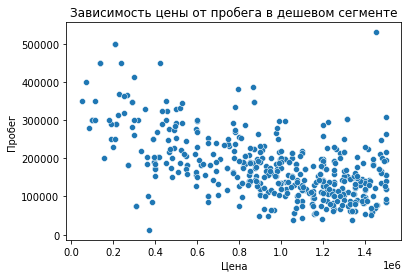

In [39]:
ax = sns.scatterplot(data=df1, x='Цена', y='Пробег');
ax.set_title('Зависимость цены от пробега в дешевом сегменте');

Аналитика: первый график представляет из себя прямую зависимость "Цена-пробег" с некоторыми отклонениями. То есть чем больше пробег, тем меньше цена. Получается такое диагонально расположенное
корреляционное полес отрицательным углом наклона.

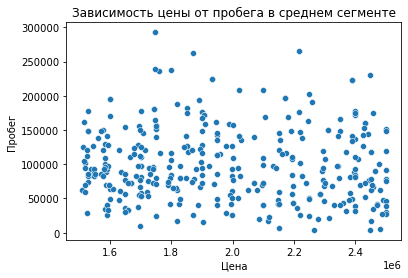

In [40]:
ax = sns.scatterplot(data=df2, x='Цена', y='Пробег');
ax.set_title('Зависимость цены от пробега в среднем сегменте');

Аналитика:второй график отражает средний сегмент, и видно, что значения разбросаны по всем осям и не наблюдается какой-либо тенденции. 
Однако нужно заметить, что пробег в среднем сегменте в основном ниже 175 тыс. км., в то время как в дешевом сегменте этот показатель достигает 500 тыс. км. 
К тому же, стоит отметить, что средний сегмент это граница между дешевым сегментом и дорогим, следовательно, по оси икс могут быть представлены, например, 
машины не повышенного класса с маленькими пробегоми машины класса люкс, но с большим пробегом.

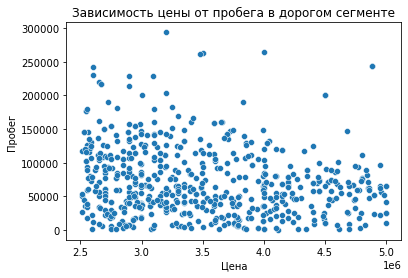

In [41]:
ax = sns.scatterplot(data=df3, x='Цена', y='Пробег');
ax.set_title('Зависимость цены от пробега в дорогом сегменте');

Аналитика:третий график - график зависимости цены от пробега для дорогостоящих машин. Корреляционное поле смещено в начало осей абсцисс и ординат сильнее, чем для среднего сегмента. 
В принципе здесь так же, как и в среднем сегменте наблюдается сильный разброс значений пробега для одной и той же цены.
Таким образом можно сделать вывод, что предположение: "Чем больше пробег, тем меньше цена" - больше актуально для недорогих машин.

# Шаг 5.

In [42]:
# стандартное отклонение цены (квадратный корень из дисперсии); грубо говоря - это разброс цены

import statistics

print(statistics.pstdev(df['Цена'], mu=None))

3388472.8908808976


In [43]:
# усреднённый портрет автомобиля на рынке

print('Название авто:')
print(*df['Название авто'].mode())
print('Кузов:')
print(*df['Кузов'].mode())
print('Цена:') 
print(*df['Цена'].mode())
print('Пробег:')
print(*df['Пробег'].mode())
print('Литровая мощность двигателя:')
print(*df['Литровая мощность двигателя'].mode())

Название авто:
Mercedes-Benz E-Класс V (W213, S213, C238)
Кузов:
внедорожник 5 дв.
Цена:
1250000
Пробег:
70000 200000 300000
Литровая мощность двигателя:
60.2191104984401


In [44]:
df.describe()
#Благодаря данным представленным ниже мы можем выяснить несколько фактов о машинах, продаваемых на авто.ру
#Минимальная цена продажи равна 500 тыс. руб, а самая дорогая машина на данном сайте стоит 50 млн руб.
#Заметим, что максимальный пробег составляет аж !530 000 км! Известно, что среднестатистический водитель проезжает в год 15-20 тыс.км.
#Делим 530 на 15, и получаем примерно 35 лет! - интересный факт


,Цена,Год выпуска,Совокупные преимущества,Новизна,Пробег,Объем двигателя,Мощность двигателя,Налог,Безопасность,Защита от угона,...,Литровая мощность двигателя,Кузов 1,Низкая цена,Средняя цена,Повышенная цена,Новизна 0,Новизна 1,Новизна 2,Новизна 3,Новизна 4
count,1.741000e+03,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,...,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000
mean,3.380268e+06,2014.049971,38.206203,3.349225,99184.383688,2.899828,273.414130,33563.287191,7.785181,2.124641,...,68.717074,3.090752,0.278576,0.201034,0.519816,0.028145,0.029294,0.083285,0.283171,0.575531
std,3.389446e+06,5.619683,23.067953,0.952815,78317.645505,1.216720,127.328646,39276.903078,5.250050,1.375055,...,14.282350,2.547442,0.448427,0.400888,0.499751,0.165434,0.168676,0.276393,0.450668,0.494404
min,5.000000e+04,1959.000000,0.000000,0.000000,1.000000,1.300000,72.000000,864.000000,0.000000,0.000000,...,26.119132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.399000e+06,2012.000000,23.000000,3.000000,41000.000000,2.000000,184.000000,9200.000000,4.000000,1.000000,...,60.219110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.588000e+06,2015.000000,38.000000,4.000000,80226.000000,2.900000,245.000000,18375.000000,8.000000,2.000000,...,67.150251,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.999000e+06,2018.000000,55.000000,4.000000,141000.000000,3.500000,333.000000,49950.000000,12.000000,3.000000,...,76.543568,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000e+07,2021.000000,106.000000,4.000000,530000.000000,6.200000,639.000000,283500.000000,23.000000,5.000000,...,152.724371,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
group = df.groupby('Дороговизна')[['Цена', 'Пробег', 'Стандартный налог на продажу']].agg(['min', 'mean', 'max'])
group
#Ниже представлена таблица с группировкой по дороговизне (=>3 класса), где указаны минимум, среднее значение и максимум по 3 характеристикам (цена, пробег,  стандартный налог на продажу)
#Выше мы уже указали минимум и максимум цен, которые вообще присутствуют на сайте
#Здесь же мы предположили при составлении таблицы и вывели, что средний сегмент авто колеблется от 1,5 млн до 2,5 млн руб
#Согласно статистике по автомобилям в России https://cenamashin.ru/statistika/russia/avg_price#:~:text=Массовый%20сегмент%20-%20цена%20нового,от%203%20000%20000%20₽
#Мы были почти правы. У них только немного смещена граница с 2,5 до 3 млн. руб.

Цена                         Пробег                 \
                          min          mean       max    min           mean   
Дороговизна                                                                   
Бюджетный сегмент       50000  9.631822e+05   1500000  12222  173696.882474   
Повышенная стоимость  2510000  5.215667e+06  50000000      1   59162.667770   
Средняя цена          1508000  1.978596e+06   2500000   4000   99530.420000   

                             Стандартный налог на продажу                 \
                         max                          min           mean   
Дороговизна                                                                
Бюджетный сегмент     530000                         6500  125213.672165   
Повышенная стоимость  294000                       326300  678036.628035   
Средняя цена          292840                       196040  257217.511429   

                               
                          max  
Дороговизна                    
Бюджетный сегмент      195000  
Повышенная стоимость  6500000  
Средняя цена           325000

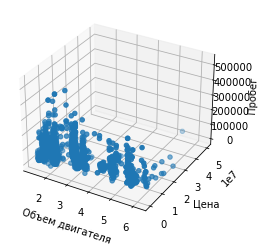

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Объем двигателя']
y = df['Цена']
z = df['Пробег']

ax.scatter(x, y, z)
ax.set_xlabel("Объем двигателя")
ax.set_ylabel("Цена")
ax.set_zlabel("Пробег")

plt.show()
#Кроме зависимости цена-пробег мы добавили еще и зависимость от объема двигателя
#В итоге, чем больше объем двигателя, тем больше цена авто